# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [12]:
cities

['vaini',
 'parrita',
 'opuwo',
 'bluff',
 'caravelas',
 'airai',
 'saint-philippe',
 'gazimurskiy zavod',
 'punta arenas',
 'aswan',
 'bengkulu',
 'victor harbor',
 'mataura',
 'ushuaia',
 'samusu',
 'butaritari',
 'hilo',
 'portland',
 'sao felix do xingu',
 'torbay',
 'yellowknife',
 'grand river south east',
 'port elizabeth',
 'beringovskiy',
 'bolungarvik',
 'san benito abad',
 'bredasdorp',
 'kamenka',
 'masallatah',
 'thompson',
 'puerto ayora',
 'saldanha',
 'khatanga',
 'raga',
 'bethel',
 'sao joao da barra',
 'mys shmidta',
 'rincon',
 'klaksvik',
 'busselton',
 'ilulissat',
 'atuona',
 'taksimo',
 'carroll',
 'new norfolk',
 'ust-omchug',
 'eureka',
 'kahului',
 'dmitriyev-lgovskiy',
 'cape town',
 'esik',
 'saint-augustin',
 'saint-vallier',
 'vanimo',
 'am timan',
 'tual',
 'mount pleasant',
 'kapaa',
 'pasighat',
 'barrow',
 'plettenberg bay',
 'asayita',
 'fortuna',
 'saskylakh',
 'saleaula',
 'kimbe',
 'samalaeulu',
 'hay river',
 'ust-nera',
 'qaanaaq',
 'nikolskoye'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#cit="Rome"
#base_url="http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url = f"{base_url}appid={weather_api_key}&q={city}" #&units={units}
#requests.get(query_url).json()
#query_url = f"{base_url}appid={weather_api_key}&q=" #&units={units}


In [3]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&q=" #&units={units}


In [4]:
trial_city="Los Angeles"
trial_query_url = f"{base_url}appid={weather_api_key}&q={trial_city}"
la_response=requests.get(trial_query_url).json()
la_response

{'coord': {'lon': -118.2437, 'lat': 34.0522},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 294.97,
  'feels_like': 293.7,
  'temp_min': 292.78,
  'temp_max': 297.49,
  'pressure': 1024,
  'humidity': 19},
 'visibility': 10000,
 'wind': {'speed': 2.57, 'deg': 70},
 'clouds': {'all': 0},
 'dt': 1669057517,
 'sys': {'type': 1,
  'id': 3694,
  'country': 'US',
  'sunrise': 1669041092,
  'sunset': 1669077995},
 'timezone': -28800,
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

In [5]:
trail=la_response['sys']['country']#['main']['humidity']
trail

'US'

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data

[]

In [32]:
city_pd=pd.DataFrame(city_data)
city_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,25.03,75,99,4.41,TO,1668803294
1,parrita,9.5201,-84.3225,27.85,77,83,2.73,CR,1668803294
2,opuwo,-18.0607,13.8400,22.50,47,24,5.60,NA,1668803295
3,bluff,-46.6000,168.3333,14.89,81,99,8.40,NZ,1668803295
4,caravelas,-17.7125,-39.2481,22.68,90,100,6.26,BR,1668803296
...,...,...,...,...,...,...,...,...,...
546,tamandare,-8.7597,-35.1047,25.58,77,13,4.70,BR,1668803566
547,bo phloi,14.3236,99.5161,23.18,94,100,2.14,TH,1668803566
548,sarany,58.5000,58.8833,-15.35,91,14,1.78,RU,1668803391
549,constitucion,-35.3333,-72.4167,18.39,71,15,9.20,CL,1668803567


In [2]:
city_pd.to_csv("/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/starter_code/city_data.csv")

NameError: name 'city_pd' is not defined

In [9]:
city_pd=pd.read_csv("/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/starter_code/city_data.csv")

In [10]:
city_pd.describe()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,275.000000,20.238725,17.539936,12.053503,72.497278,58.867514,3.716969,1.668803e+09
std,159.204271,33.385558,90.136610,15.402445,20.088248,39.220990,2.626308,1.078969e+02
min,0.000000,-54.800000,-175.200000,-39.340000,9.000000,0.000000,0.000000,1.668803e+09
25%,137.500000,-7.501550,-61.624950,1.165000,63.000000,20.000000,1.790000,1.668803e+09
50%,275.000000,22.678300,20.750000,16.220000,77.000000,75.000000,3.050000,1.668803e+09
75%,412.500000,49.308450,98.192200,24.550000,87.000000,99.000000,5.035000,1.668803e+09
max,550.000000,78.218600,179.316700,38.580000,100.000000,100.000000,17.110000,1.668804e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_pd

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,vaini,-21.2000,-175.2000,25.03,75,99,4.41,TO,1668803294
1,1,parrita,9.5201,-84.3225,27.85,77,83,2.73,CR,1668803294
2,2,opuwo,-18.0607,13.8400,22.50,47,24,5.60,NaN,1668803295
3,3,bluff,-46.6000,168.3333,14.89,81,99,8.40,NZ,1668803295
4,4,caravelas,-17.7125,-39.2481,22.68,90,100,6.26,BR,1668803296
...,...,...,...,...,...,...,...,...,...,...
546,546,tamandare,-8.7597,-35.1047,25.58,77,13,4.70,BR,1668803566
547,547,bo phloi,14.3236,99.5161,23.18,94,100,2.14,TH,1668803566
548,548,sarany,58.5000,58.8833,-15.35,91,14,1.78,RU,1668803391
549,549,constitucion,-35.3333,-72.4167,18.39,71,15,9.20,CL,1668803567


In [12]:
#  Get the indices of cities that have humidity over 100%.
humidity_cities=city_pd.loc[city_pd.Humidity==100]
humidity_cities



,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
147,147,pevek,69.7008,170.3133,-30.02,100,46,2.10,RU,1668803366
161,161,cherskiy,68.7500,161.3000,-38.45,100,39,2.19,RU,1668803372
205,205,nome,64.5011,-165.4064,1.04,100,100,1.54,US,1668803392
253,253,skelleftea,64.7507,20.9528,-6.11,100,100,3.60,SE,1668803417
362,362,kuching,1.5500,110.3333,23.12,100,40,0.51,MY,1668803475
433,433,ust-maya,60.4167,134.5333,-22.36,100,98,1.11,RU,1668803510
470,470,podgorica,42.4411,19.2636,15.84,100,75,1.03,ME,1668803528
477,477,teguldet,57.3064,88.1667,-16.18,100,92,1.73,RU,1668803531
497,497,bereda,43.2686,-7.5406,6.90,100,98,1.73,ES,1668803542
517,517,soria,41.6667,-2.6667,3.25,100,32,3.22,ES,1668803552


In [13]:
city_pd=city_pd.drop([147,161,205,253,362,433,470,477,497,517])
len(city_pd)

541

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

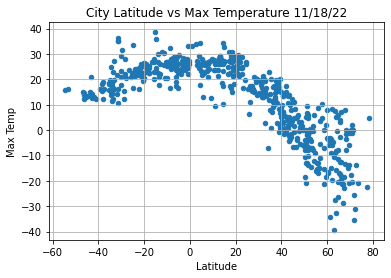

In [24]:
lat_temp_plot=city_pd.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, title="City Latitude vs Max Temperature 11/18/22")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/Lat_vs_Temp.png')
plt.show()



In [21]:
#The max temperature seem to be higher in the southern hemisphere 

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

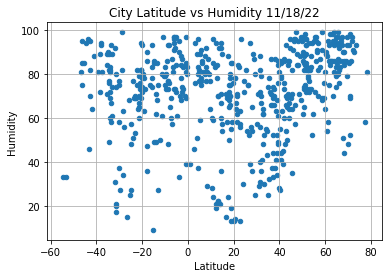

In [25]:
city_pd.plot(kind="scatter", x="Lat", y="Humidity", grid=True, title="City Latitude vs Humidity 11/18/22")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/Lat_vs_Humidity.png')

plt.show()

In [ ]:
#There is a clister of cities that have high humidity (80+) in the northern hemisphere

## Latitude vs. Cloudiness Plot

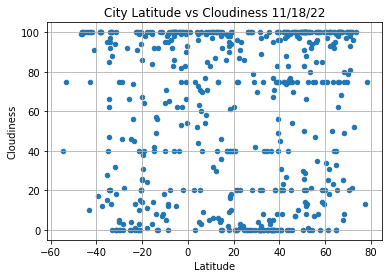

In [26]:
city_pd.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, title="City Latitude vs Cloudiness 11/18/22")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/Lat_vs_Cloudiness.png')
plt.show()

In [ ]:
#latitude and cloudiness do not seem to show a distinct pattern

## Latitude vs. Wind Speed Plot

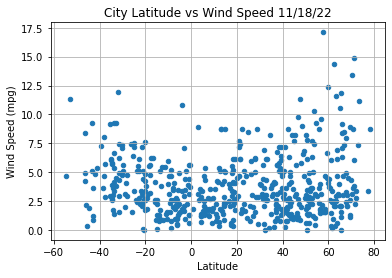

In [27]:
city_pd.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, title="City Latitude vs Wind Speed 11/18/22")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/Lat_vs_WindSpeed.png')
plt.show()

In [ ]:
#looks like during this day, wind sppeds were relatively low across the observed cities.

## Linear Regression

In [29]:
#seperated the data from Northern and Southern Hemisphere
southern_lat=city_pd.loc[city_pd["Lat"]<0]
southern_lat
northern_lat=city_pd.loc[city_pd["Lat"]>0]
northern_lat


,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,parrita,9.5201,-84.3225,27.85,77,83,2.73,CR,1668803294
7,7,gazimurskiy zavod,51.5461,118.3266,-7.67,96,100,1.36,RU,1668803297
9,9,aswan,24.0934,32.9070,19.75,30,2,4.63,EG,1668803299
14,14,butaritari,3.0707,172.7902,27.21,76,0,8.94,KI,1668803301
15,15,hilo,19.7297,-155.0900,27.92,76,40,2.68,US,1668803302
...,...,...,...,...,...,...,...,...,...,...
541,541,kinsale,51.7075,-8.5306,4.65,93,20,4.12,IE,1668803563
543,543,bang khla,13.7214,101.2081,27.96,92,100,1.40,TH,1668803564
547,547,bo phloi,14.3236,99.5161,23.18,94,100,2.14,TH,1668803566
548,548,sarany,58.5000,58.8833,-15.35,91,14,1.78,RU,1668803391


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

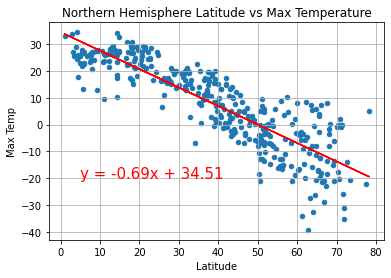

the r-value is : -1.726494173190589


In [30]:
#create x and y values for Northern Hem cities
x_values = northern_lat['Lat'].astype('float')
y_values = northern_lat['Max Temp'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
northern_lat.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, title="Northern Hemisphere Latitude vs Max Temperature")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.xlabel("Latitude")

plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/North_Temp.png')
plt.show()

print(f"the r-value is : {rvalue *2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

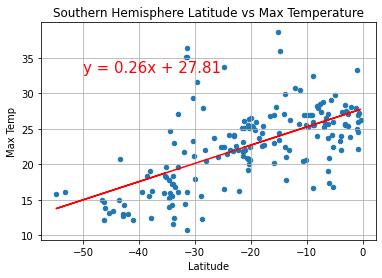

the r-value is : 1.2287498483949761


In [34]:
#create x and y values for Northern Hem cities
x_values = southern_lat['Lat'].astype('float')
y_values = southern_lat['Max Temp'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
s_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
southern_lat.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, title="Southern Hemisphere Latitude vs Max Temperature")
plt.plot(x_values,regress_values,"r-")
plt.annotate(s_line_eq,(-50,33),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/South_Temp.png')
plt.show()

print(f"the r-value is : {rvalue *2}")


In [ ]:
#Max Temperature Observations
#the maximum temperture linear regression for both north and south lead towards the equator. This makes sense given the position of the equator towars the sun.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

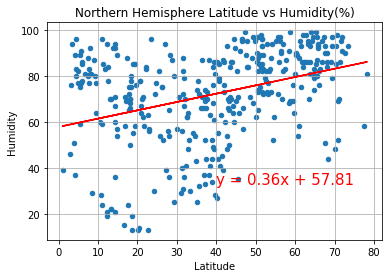

the r-value is : 0.7027136711912343


In [31]:
#create x and y values for Northern Hem cities
x_values = northern_lat['Lat'].astype('float')
y_values = northern_lat['Humidity'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
northern_lat.plot(kind="scatter", x="Lat", y="Humidity", grid=True, title="Northern Hemisphere Latitude vs Humidity(%)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,33),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/North_Hum.png')
plt.show()

print(f"the r-value is : {rvalue *2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

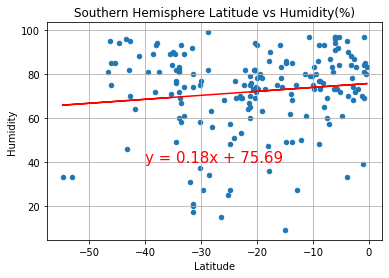

the r-value is : 0.25357783890282165


In [35]:
#create x and y values for Northern Hem cities
x_values = southern_lat['Lat'].astype('float')
y_values = southern_lat['Humidity'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
southern_lat.plot(kind="scatter", x="Lat", y="Humidity", grid=True, title="Southern Hemisphere Latitude vs Humidity(%)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/South_Hum.png')
plt.show()

print(f"the r-value is : {rvalue *2}")

In [ ]:
#Humidity Observations
#From both charts, there seems to be a rise in humidity percentages as it heads north.
#There seems to be a hgher escalation as it reaches towards the latitude of 70 degrees

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

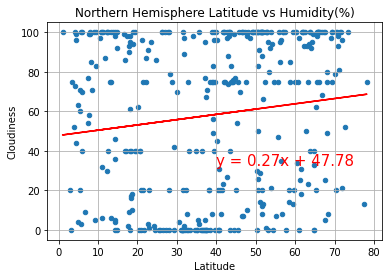

the r-value is : 0.2670345354522803


In [32]:
#create x and y values for Northern Hem cities
x_values = northern_lat['Lat'].astype('float')
y_values = northern_lat['Cloudiness'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
northern_lat.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, title="Northern Hemisphere Latitude vs Humidity(%)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,33),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/North_Cloud.png')
plt.show()

print(f"the r-value is : {rvalue *2}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

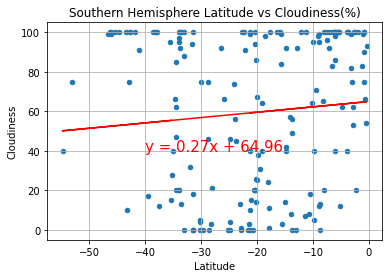

the r-value is : 0.18484558929082417


In [36]:
#create x and y values for Northern Hem cities
x_values = southern_lat['Lat'].astype('float')
y_values = southern_lat['Cloudiness'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
southern_lat.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, title="Southern Hemisphere Latitude vs Cloudiness(%)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/South_Cloud.png')
plt.show()

print(f"the r-value is : {rvalue *2}")

In [ ]:
# Wind Speed Observations
#Again Cloudiness follows the same pattern as humidity. Where cloudiness increases as heading towards the northern hemisphere.
#There is a coorelation between humidity and cloudiness. I suspect it has to do with the seasons.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

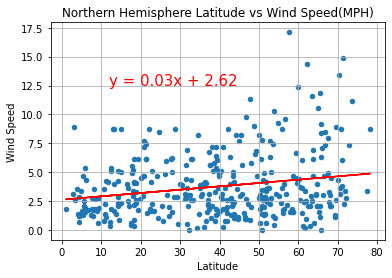

the r-value is : 0.4123385202373313


In [33]:
#create x and y values for Northern Hem cities
x_values = northern_lat['Lat'].astype('float')
y_values = northern_lat['Wind Speed'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
northern_lat.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, title="Northern Hemisphere Latitude vs Wind Speed(MPH)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,12.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/North_WindSpeed.png')
plt.show()

print(f"the r-value is : {rvalue *2}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

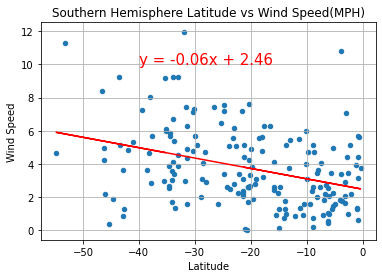

the r-value is : -0.715704519047304


In [37]:
#create x and y values for Northern Hem cities
x_values = southern_lat['Lat'].astype('float')
y_values = southern_lat['Wind Speed'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#create a scatterplot with the equation for the line
southern_lat.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, title="Southern Hemisphere Latitude vs Wind Speed(MPH)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.savefig('/Users/rayzapien/Data/UCI-VIRT-DATA-PT-10-2022-U-LOLC/02-Homework/06-Python-APIs/Instructions/Images/South_WindSpeed.png')
plt.show()

print(f"the r-value is : {rvalue *2}")

In [ ]:
#Wind Speed observations
# Wins speeds seem to drop at the eqautor to an average of roughly 2.5 MPH.I estimate this by the y intercept of both graphs